In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
import copy as cp



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
i= str(5)
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_"+i+".h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_"+i+".h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_"+i+".h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_5.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [4]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_"+i) 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_"+i) 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True) 
qr_mcPhoIso0=cp.deepcopy(qr_mc)
qr_dataPhoIso0=cp.deepcopy(qr_data)
qr_mcPhoIso0.df['PhoIso03']=0
qr_dataPhoIso0.df['PhoIso03']=0
qr_mcPhoIso0.df['PhoIso03_corr']=0

Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [10]:
#put median in SigmaIeIe different barrel/endcap
dB = qr_mc.df.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dE = qr_mc.df.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dB["SigmaIeIe"]=dB["SigmaIeIe"].median()
dE["SigmaIeIe"]=dE["SigmaIeIe"].median()
frame = [dB, dE] 
qr_mc.df = pd.concat(frame) .reset_index(drop=True) 

#put median in SigmaIeIe different barrel/endcap
dB = qr_mcPhoIso0.df.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dE = qr_mcPhoIso0.df.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dB["SigmaIeIe"]=dB["SigmaIeIe"].median()
dE["SigmaIeIe"]=dE["SigmaIeIe"].median()
frame = [dB, dE] 
qr_mcPhoIso0.df = pd.concat(frame) .reset_index(drop=True) 

#put median in SigmaIeIe different barrel/endcap
dB = qr_data.df.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dE = qr_data.df.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dB["SigmaIeIe"]=dB["SigmaIeIe"].median()
dE["SigmaIeIe"]=dE["SigmaIeIe"].median()
frame = [dB, dE] 
qr_data.df = pd.concat(frame).reset_index(drop=True) 

#put median in SigmaIeIe different barrel/endcap
dB = qr_dataPhoIso0.df.query('-1.444 < ScEta & ScEta <1.444') # ('abs(ScEta)<1.444')
dE = qr_dataPhoIso0.df.query('ScEta < -1.57 | ScEta >1.57  ') # ('abs(ScEta)>1.57')
dB["SigmaIeIe"]=dB["SigmaIeIe"].median()
dE["SigmaIeIe"]=dE["SigmaIeIe"].median()
frame = [dB, dE] 
qr_dataPhoIso0.df = pd.concat(frame) .reset_index(drop=True) 

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [11]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    1.2s remaining:   17.8s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    1.4s remaining:    9.3s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    1.5s remaining:    6.4s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    1.6s remaining:    4.6s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    1.8s remaining:    3.7s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    1.9s remaining:    3.0s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    2.0s remaining:    2.4s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    2.0s remaining:    1.9s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    2.2s remaining:    1.6s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    2.3s remaining:    1.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    2.5s remaining:    1.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.52 s, sys: 1.03 s, total: 2.55 s
Wall time: 3.55 s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:    2.9s finished
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [12]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
#("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [13]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_dataPhoIso0.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
%time qr_mcPhoIso0.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfdataPhoIso0=  qr_dataPhoIso0.getDF()
dfmc = qr_mc.getDF()
dfmcPhoIso0 = qr_mcPhoIso0.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   30.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   31.2s remaining:  7.5min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   31.7s remaining:  3.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   37.9s remaining:  2.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   41.2s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   44.8s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   50.3s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   51.5s remaining:  1.0min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   55.1s remaining:   51.7s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   55.4s remaining:   40.0s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   55.9s remaining:   30.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   56.2s remaining:   23.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.11 s, sys: 905 ms, total: 2.01 s
Wall time: 1min 3s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:  1.0min finished
[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   29.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   30.8s remaining:  7.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   34.0s remaining:  3.8min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   37.6s remaining:  2.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   41.4s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   49.3s remaining:  1.7min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   50.1s remaining:  1.3min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   53.1s remaining:  1.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   54.6s remaining:   51.2s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   56.1s remaining:   40.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   57.5s remaining:   31.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   5

CPU times: user 1.1 s, sys: 856 ms, total: 1.95 s
Wall time: 1min 5s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:  1.1min finished
[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   36.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   36.9s remaining:  8.9min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   37.9s remaining:  4.3min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   39.4s remaining:  2.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   46.8s remaining:  2.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   53.7s remaining:  1.9min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   54.2s remaining:  1.4min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   54.7s remaining:  1.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   59.4s remaining:   55.7s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.0min remaining:   45.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   35.0s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   35.9s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   37.5s remaining:  9.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   38.8s remaining:  4.4min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   40.7s remaining:  2.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   49.0s remaining:  2.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   53.2s remaining:  1.9min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   57.2s remaining:  1.5min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   59.4s remaining:  1.2min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.0min remaining:   57.4s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   45.7s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   36.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   28.1s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 3.06 s, sys: 2.4 s, total: 5.46 s
Wall time: 2min 25s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   34.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   35.7s remaining:  8.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   40.4s remaining:  4.5min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   43.6s remaining:  3.0min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   48.3s remaining:  2.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   57.2s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   59.0s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   59.5s remaining:  1.2min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.0min remaining:   57.3s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.0min remaining:   44.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.0min remaining:   34.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   26.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   30.7s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   30.8s remaining:  7.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   32.1s remaining:  3.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   44.7s remaining:  3.1min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   48.8s remaining:  2.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   57.1s remaining:  2.0min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   59.6s remaining:  1.6min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.0min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.1min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.1min remaining:   46.9s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.1min remaining:   36.8s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.1min remaining:   27.9s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 3.07 s, sys: 2.61 s, total: 5.68 s
Wall time: 2min 24s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:  1.2min finished


In [14]:
dfmc["moriondPhoIDIso0"]=dfmcPhoIso0["moriondPhoID"]
dfmc["moriondPhoIDIso0corrAll"]=dfmcPhoIso0["moriondPhoIDcorrAll"]

In [15]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfIsoEB   = dfdataPhoIso0  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfIsoEE   = dfdataPhoIso0  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcIsoEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcIsoEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

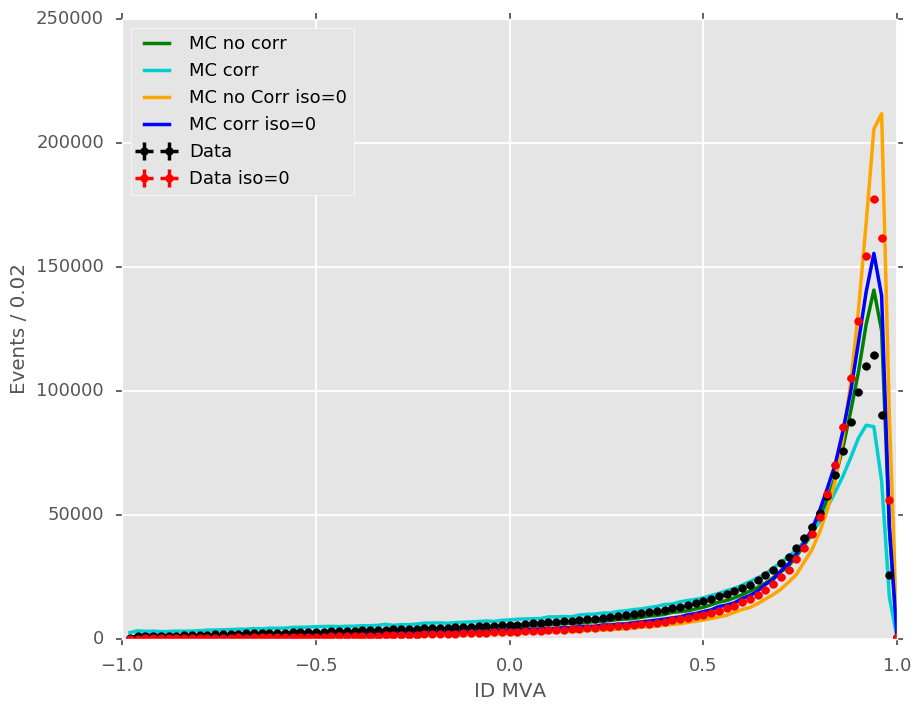

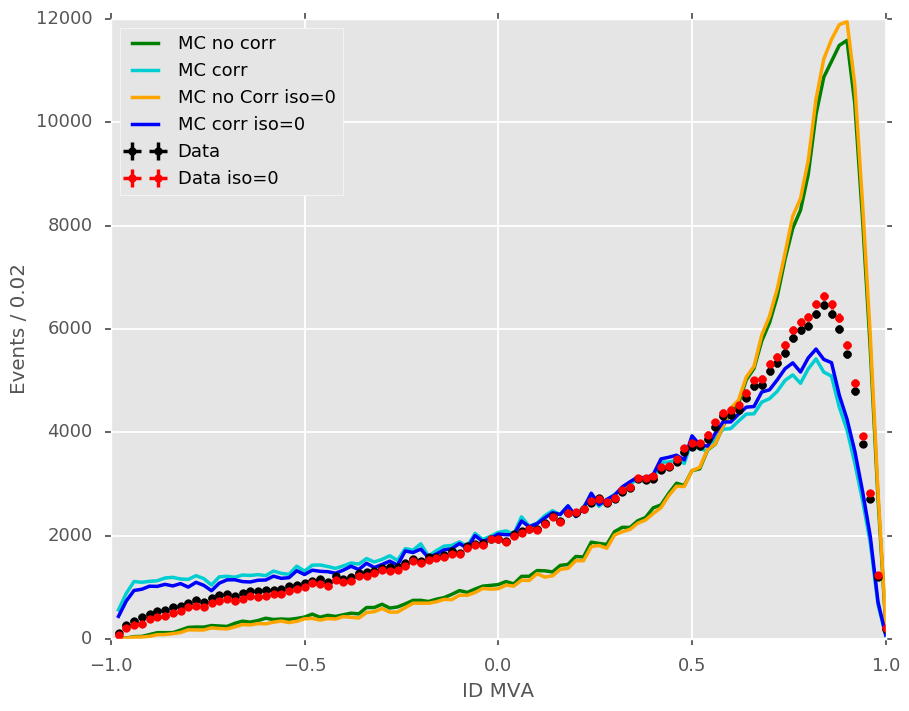

In [17]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrAll', 'Iso0', 'Iso0corrAll']
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr ',color='darkturquoise'), 
             dict(label='MC no Corr iso=0',color='orange'),
             dict(label='MC corr iso=0',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB,dfIsoEB), (dfEE,dfmcEE,dfIsoEE) ]: 
    data1, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    data2, mc = plot.data_mc(dfs[2],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    draw_datas_mc(bins, data1, data2, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=False, figsize=(10,8))
  

In [18]:
def draw_datas_mc(bins,data1,data2, mc,figsize=(8,6),var=None,logy=False,ratio=False,
                **kwargs):
    
    mcstyle=dict(alpha=0.5,linewidth=0)
    mcstyle.update(kwargs)
    datastyle=cp.copy(kwargs)
    datastyle["alpha"] = 1. # No transparency for data
    
    binw=bins[1]-bins[0]
    if ratio:
        fig, axes = plt.subplots(2,figsize=figsize,sharex=True,gridspec_kw = {'height_ratios':[3, 1]})
        top = axes[0]
        bottom = axes[1]
        fig.tight_layout()
    else:
        fig = plt.figure(figsize=figsize)
        axes = None
        top = plt
    
    # FIXME: assumes uniform binning
    xc = bins[1:]-binw*0.5
    
    #print mc
    for hist, style in mc:
        pkwargs = cp.copy(mcstyle)
        pkwargs.update(style)
        top.plot(xc+binw*0.5,hist,**pkwargs)
    top.errorbar( xc+binw*0.5, data1,ls='None', xerr=np.ones_like(data1)*binw*0.5, yerr=np.sqrt(data1), color='black', 
                 label='Data', fmt='o', **datastyle )
    top.errorbar( xc+binw*0.5, data2,ls='None', xerr=np.ones_like(data2)*binw*0.5, yerr=np.sqrt(data2), color='red', 
                 label='Data iso=0', fmt='o', **datastyle )
        
    if axes == None: axes = fig.axes
    
    if ratio:
        ratios = []
        for hist, style in mc:
            rdata = data / hist
            rdata_err = np.sqrt(data) / hist
            ratios.append((rdata,rdata_err))
            rkwargs = {}
            if len(mc) == 1: rkwargs['color'] = 'black'
            elif "color" in style: rkwargs['color'] = style['color']
            rkwargs.update(datastyle)
            bottom.errorbar( xc+binw*0.5, rdata,ls='None', xerr=np.ones_like(rdata)*binw*0.5, yerr=rdata_err, 
                        **rkwargs)
        
        bottom.plot( (bins[0],bins[-1]), (1,1), 'k-' )
        bottom.set_ylabel('Data / MC')
        bottom.set_ylim(0,2)
    
    if logy:
        axes[0].set_yscale('log')
    axes[0].set_xlim(bins[0],bins[-1])
    
    unit = None    
    if var != None:
        if type(var) != str:
            var, unit = var
        if unit: var += " (%s)" % unit
        axes[-1].set_xlabel(var)
    ylabel = 'Events / %1.3g' % binw
    if unit:
        ylabel += ' %s' % unit
    axes[0].set_ylabel(ylabel)

    top.legend(loc='best')
        

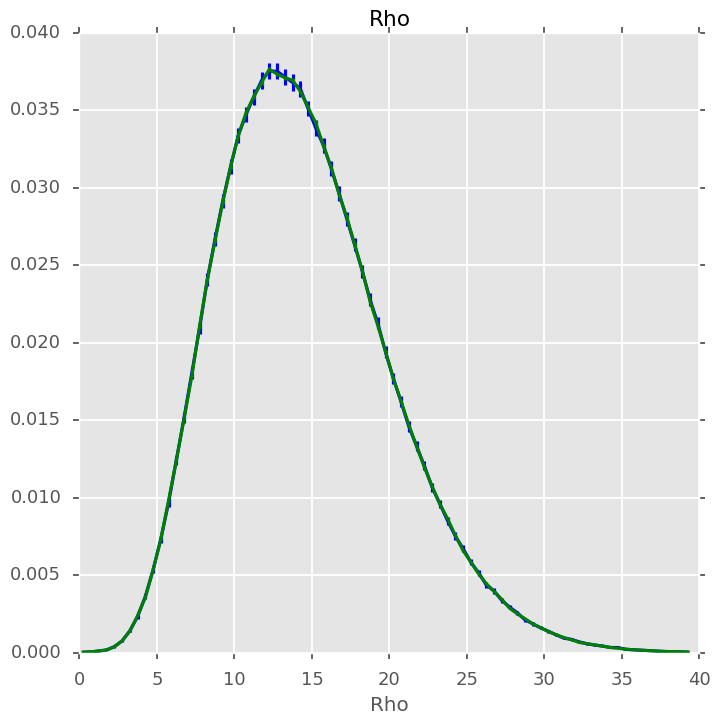

In [19]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b", Weight=dfmc["weight"])

plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g",Weight=dfdata["weight"])
ax.set_title("Rho")

plotting  R9


/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


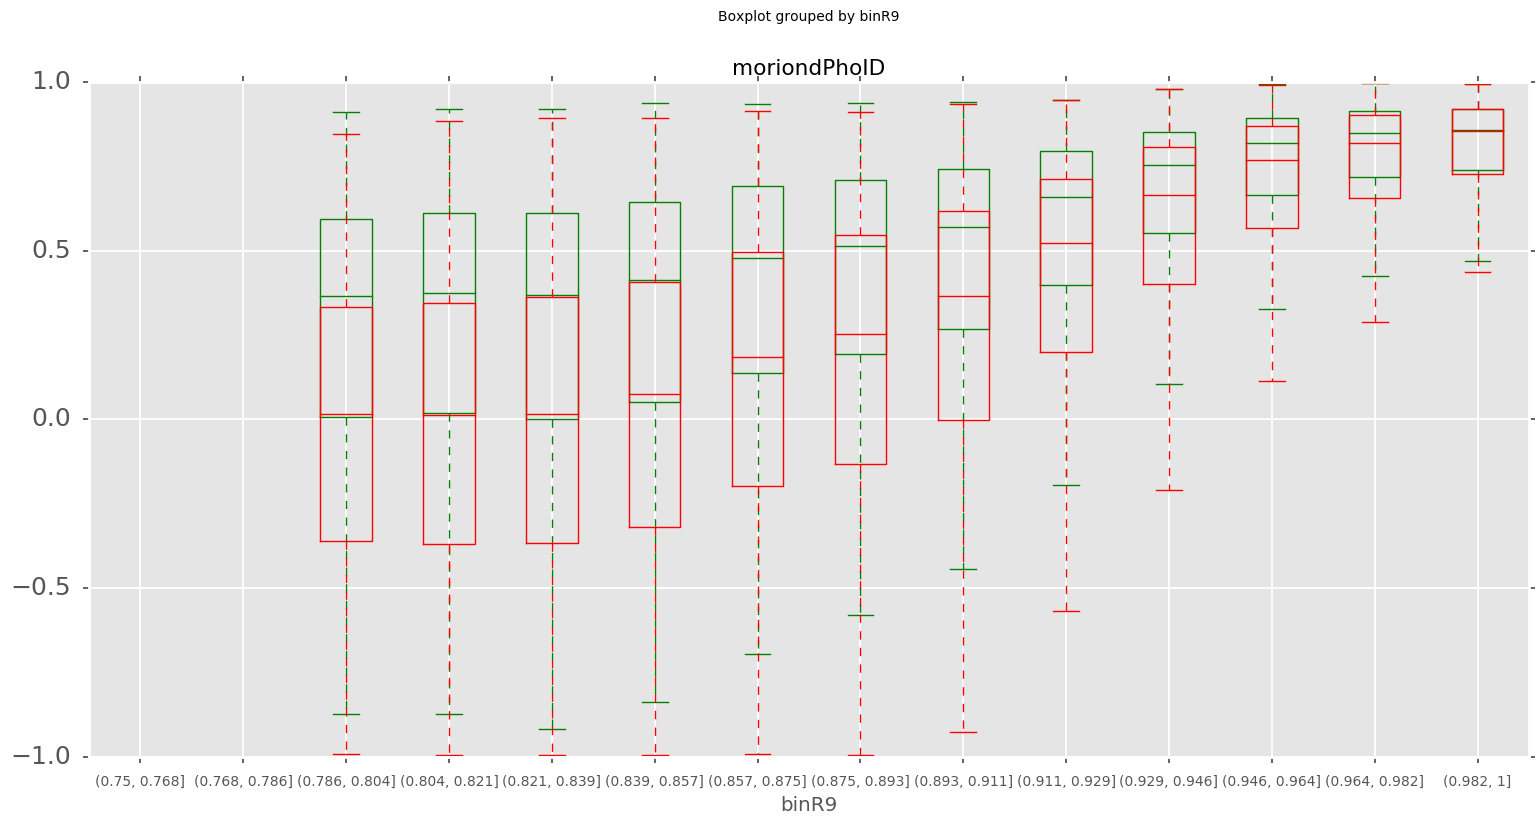

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


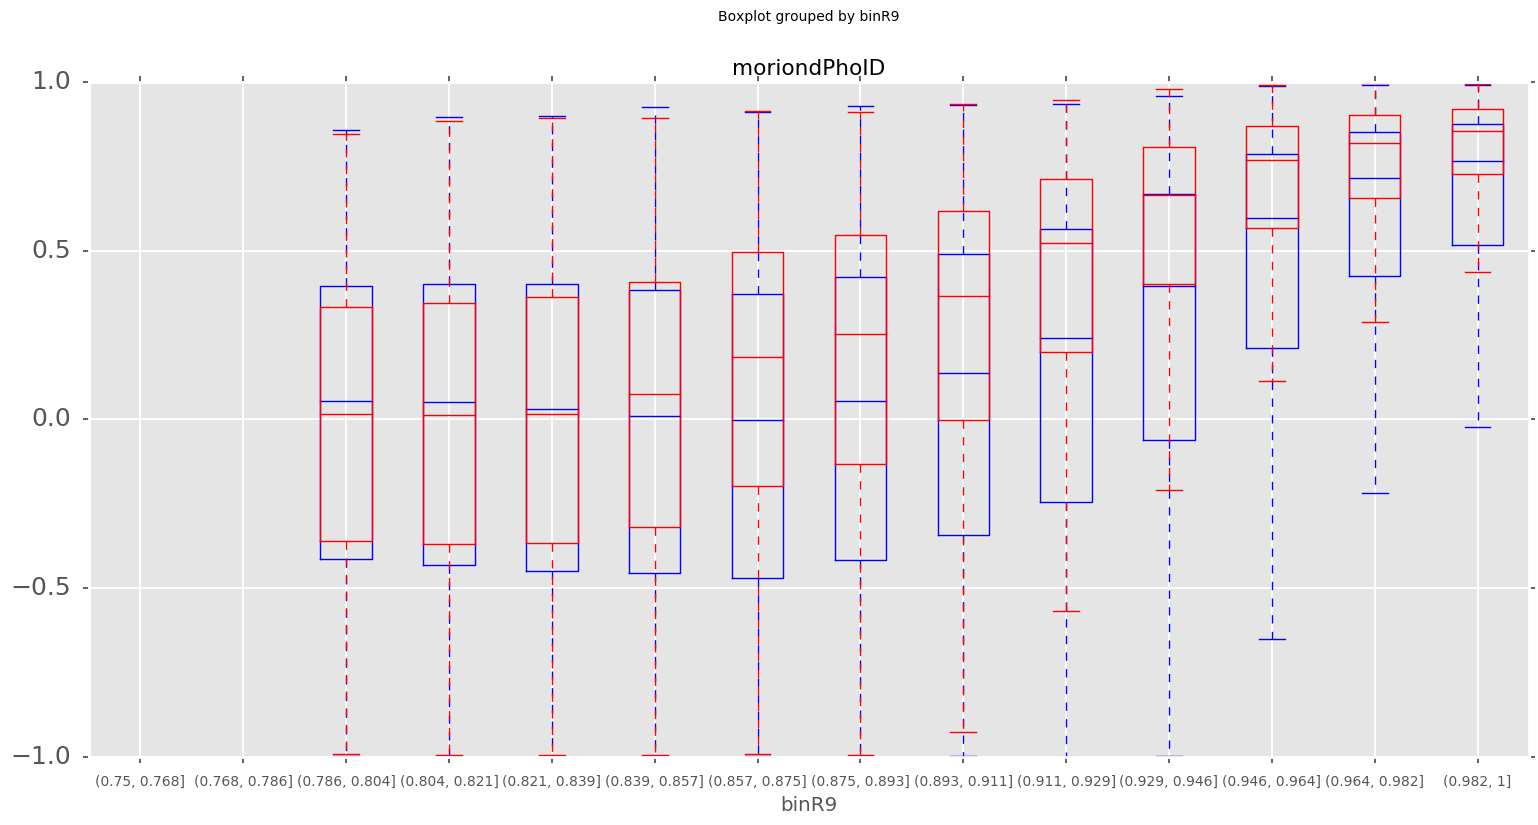

plotting  S4


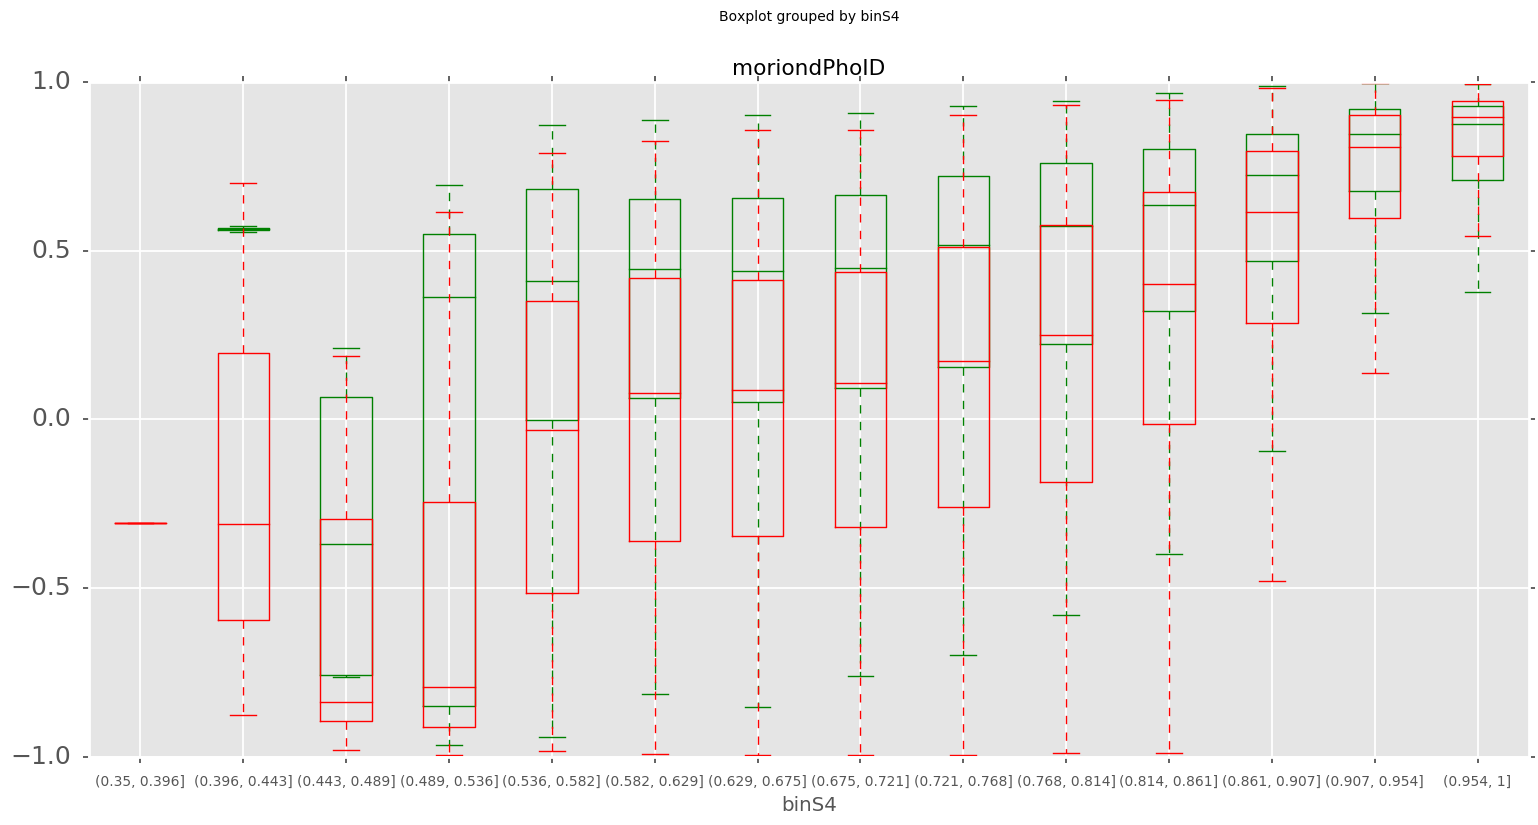

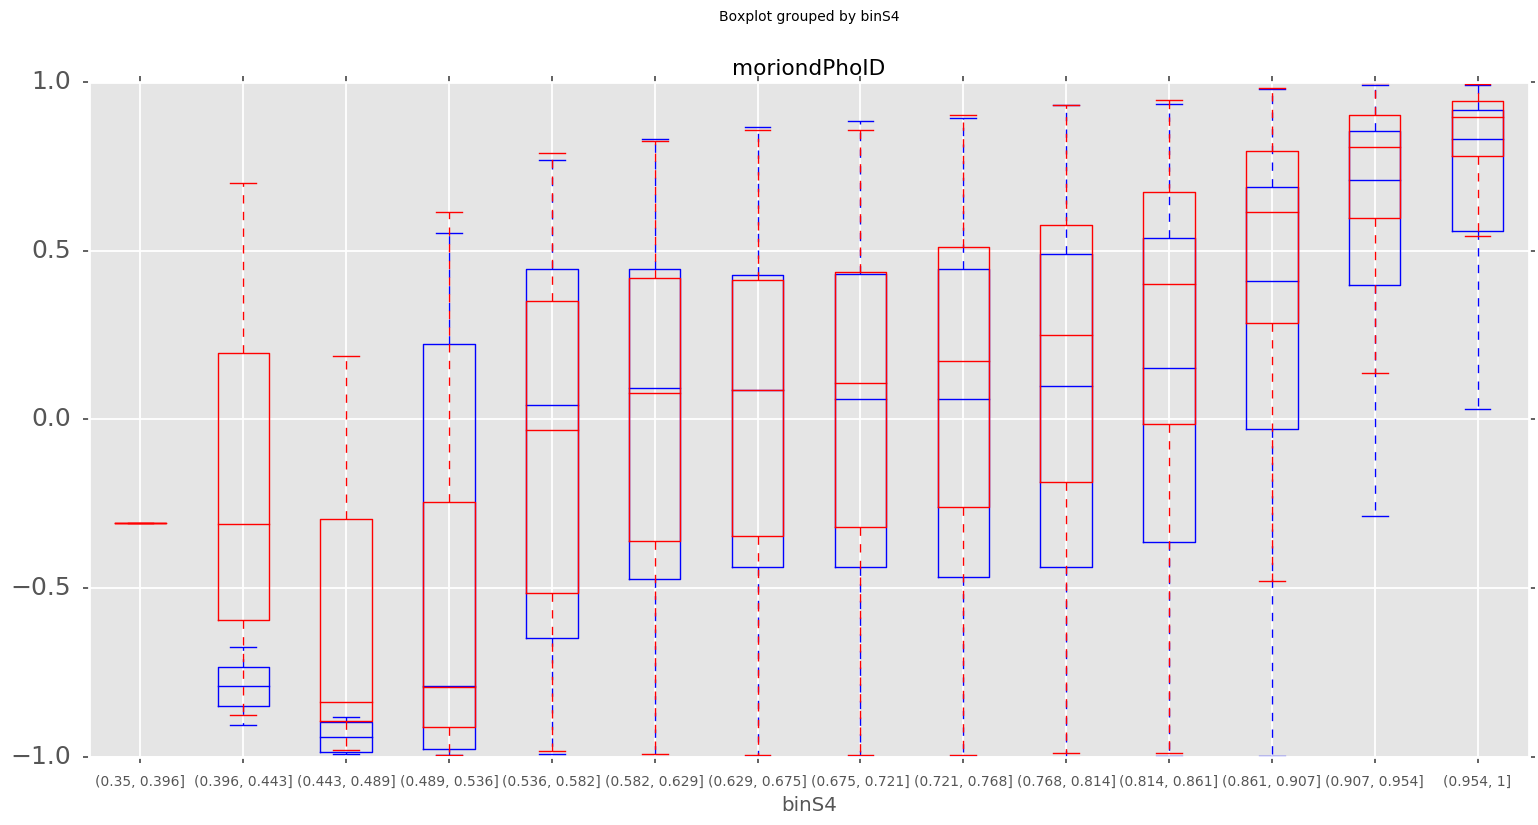

plotting  SigmaIeIe


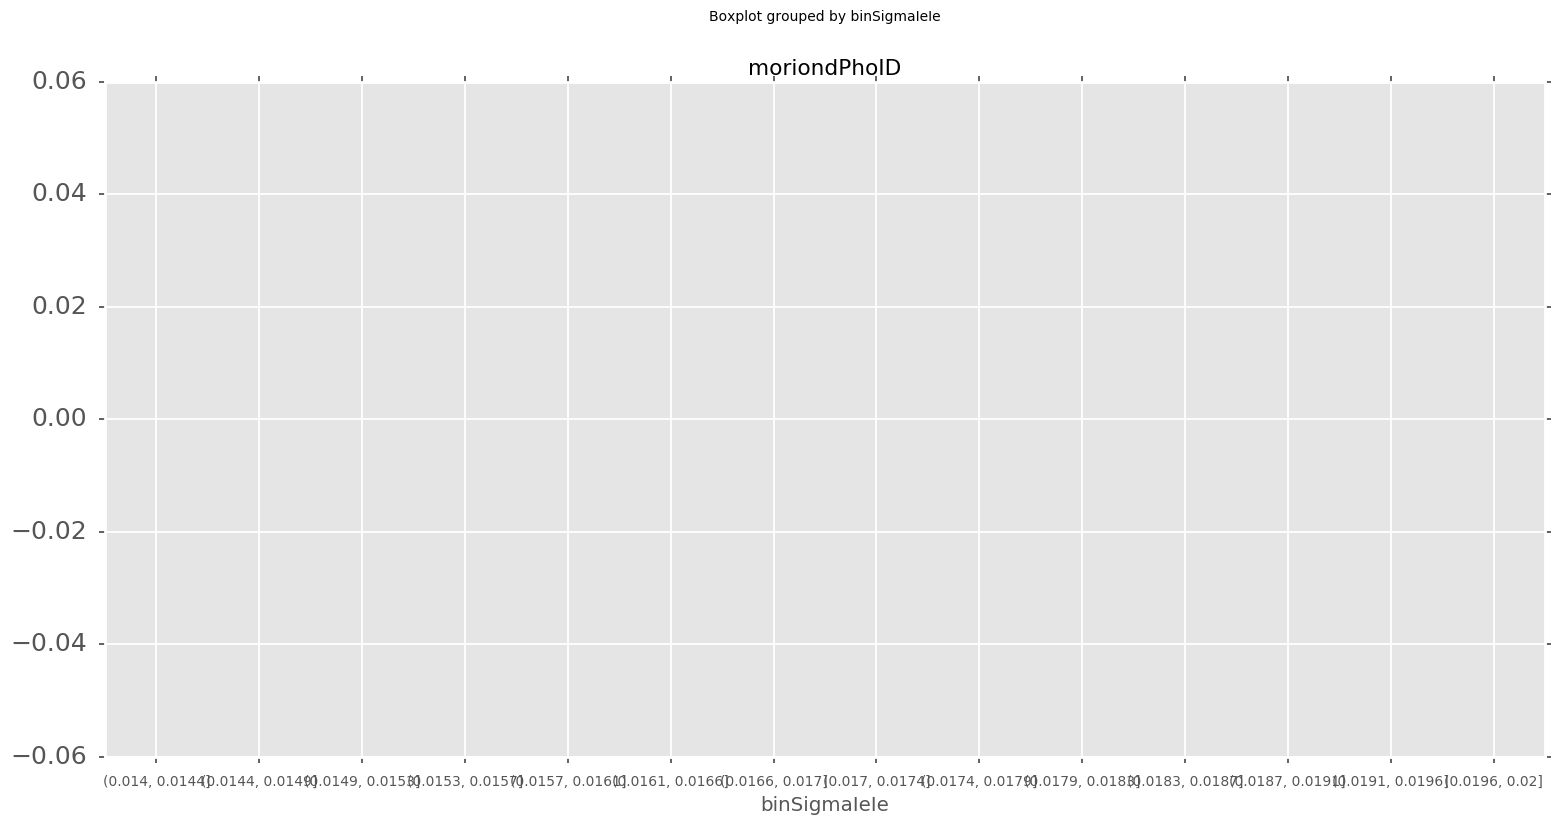

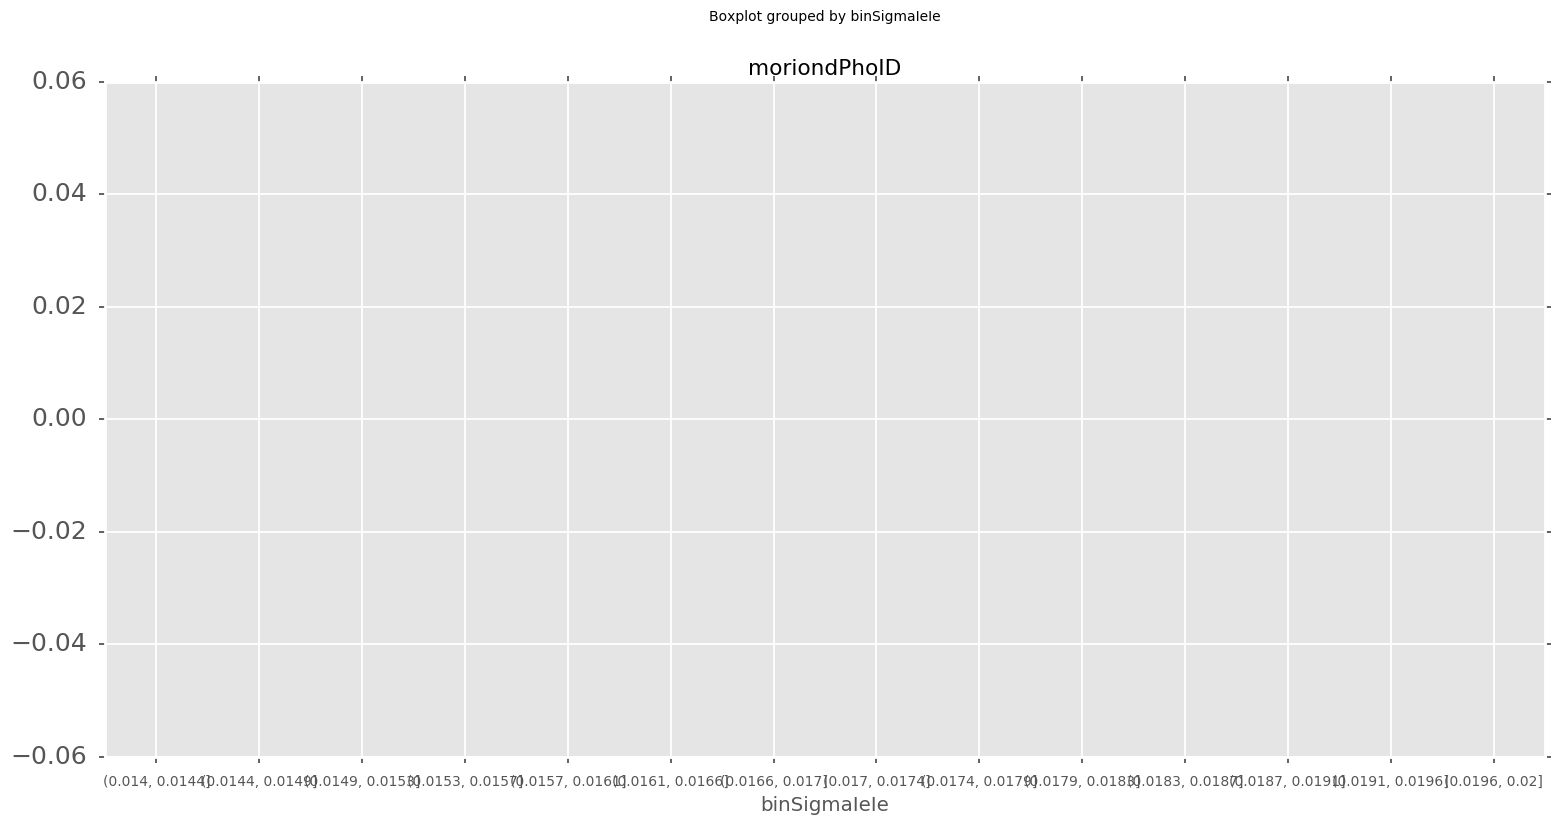

plotting  EtaWidth


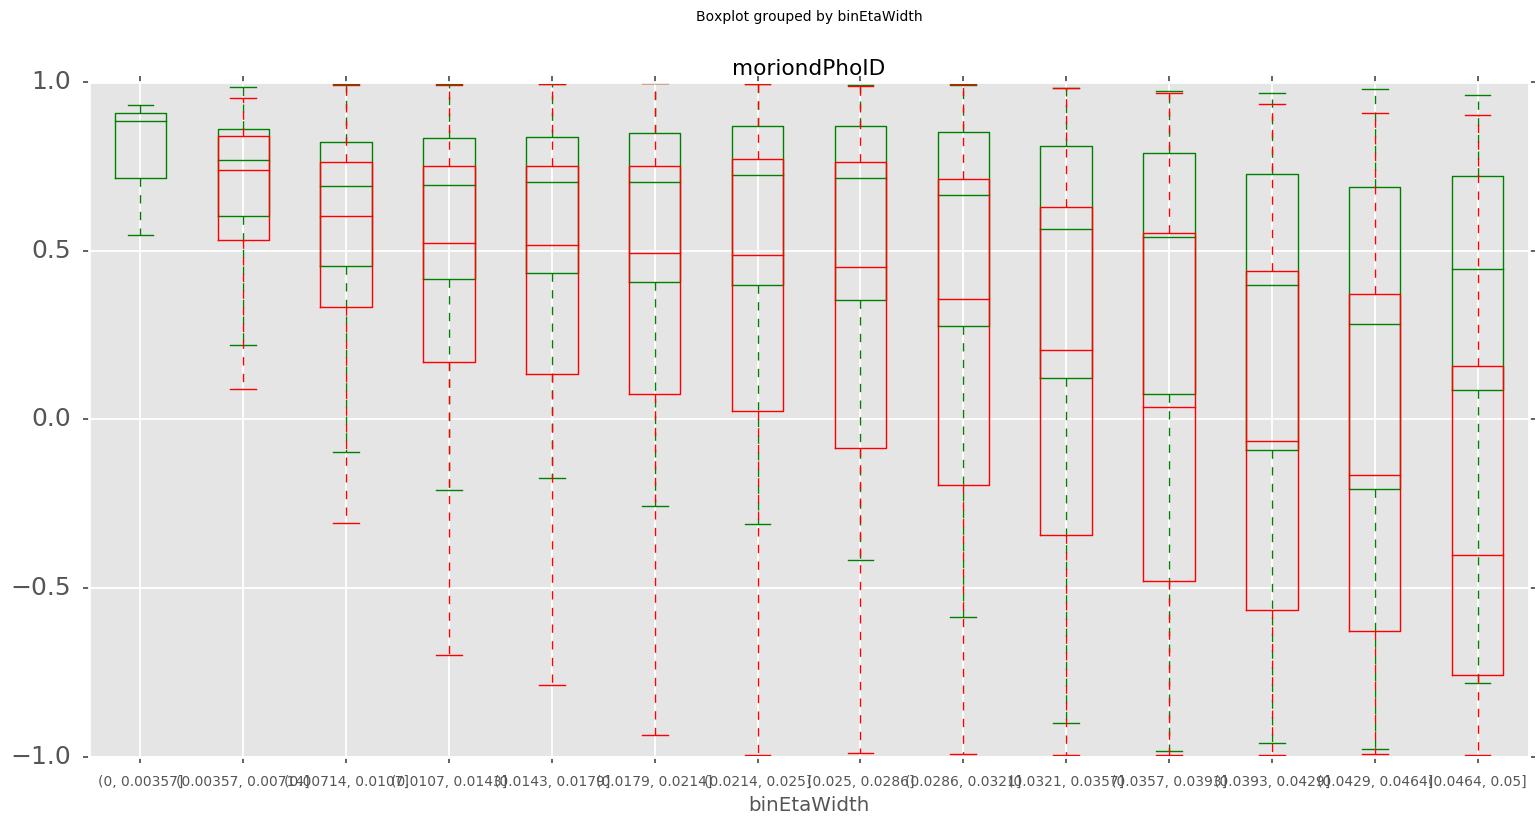

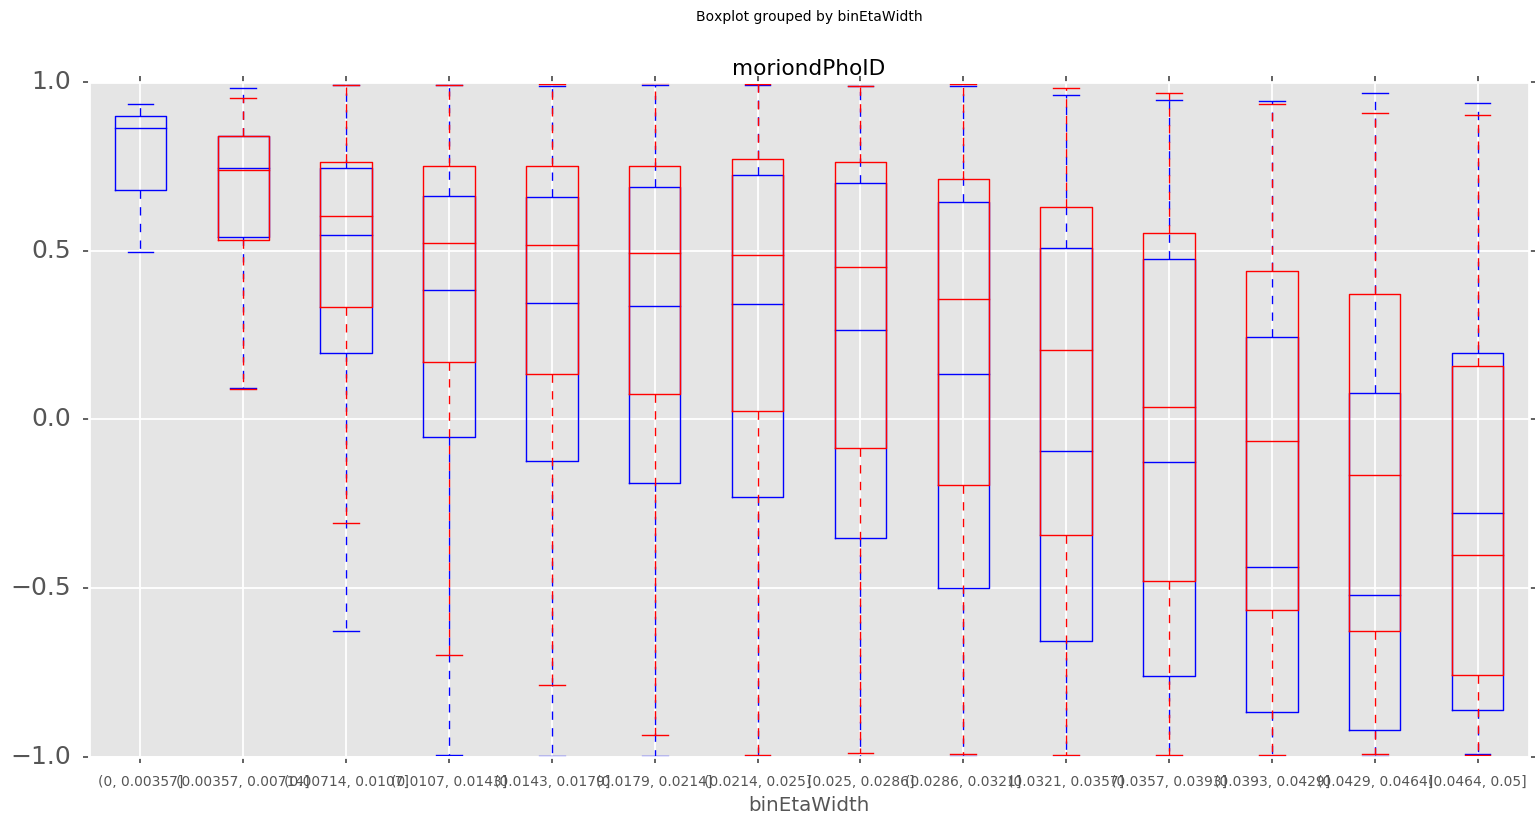

plotting  PhiWidth


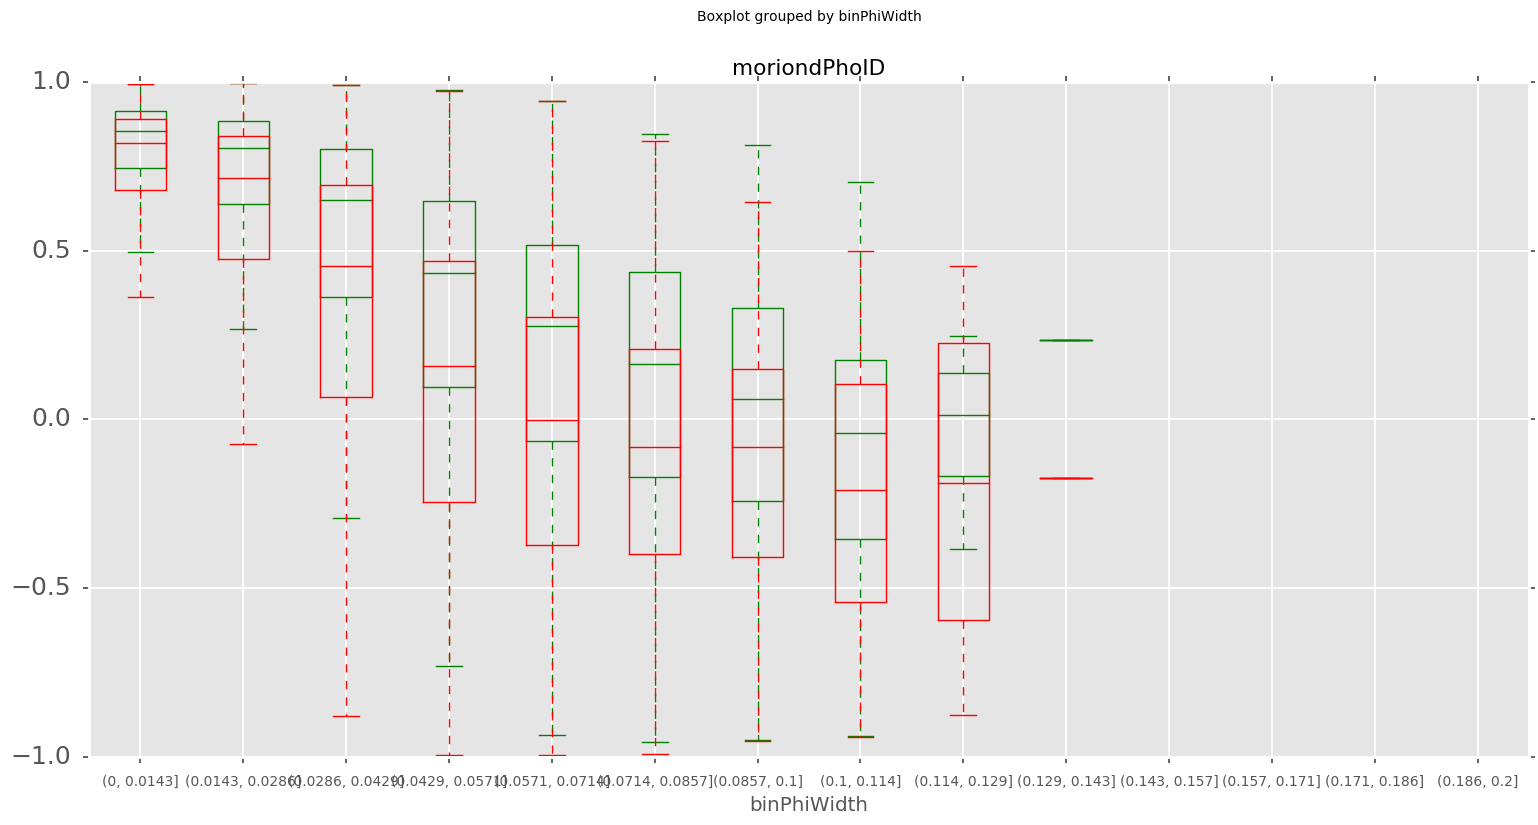

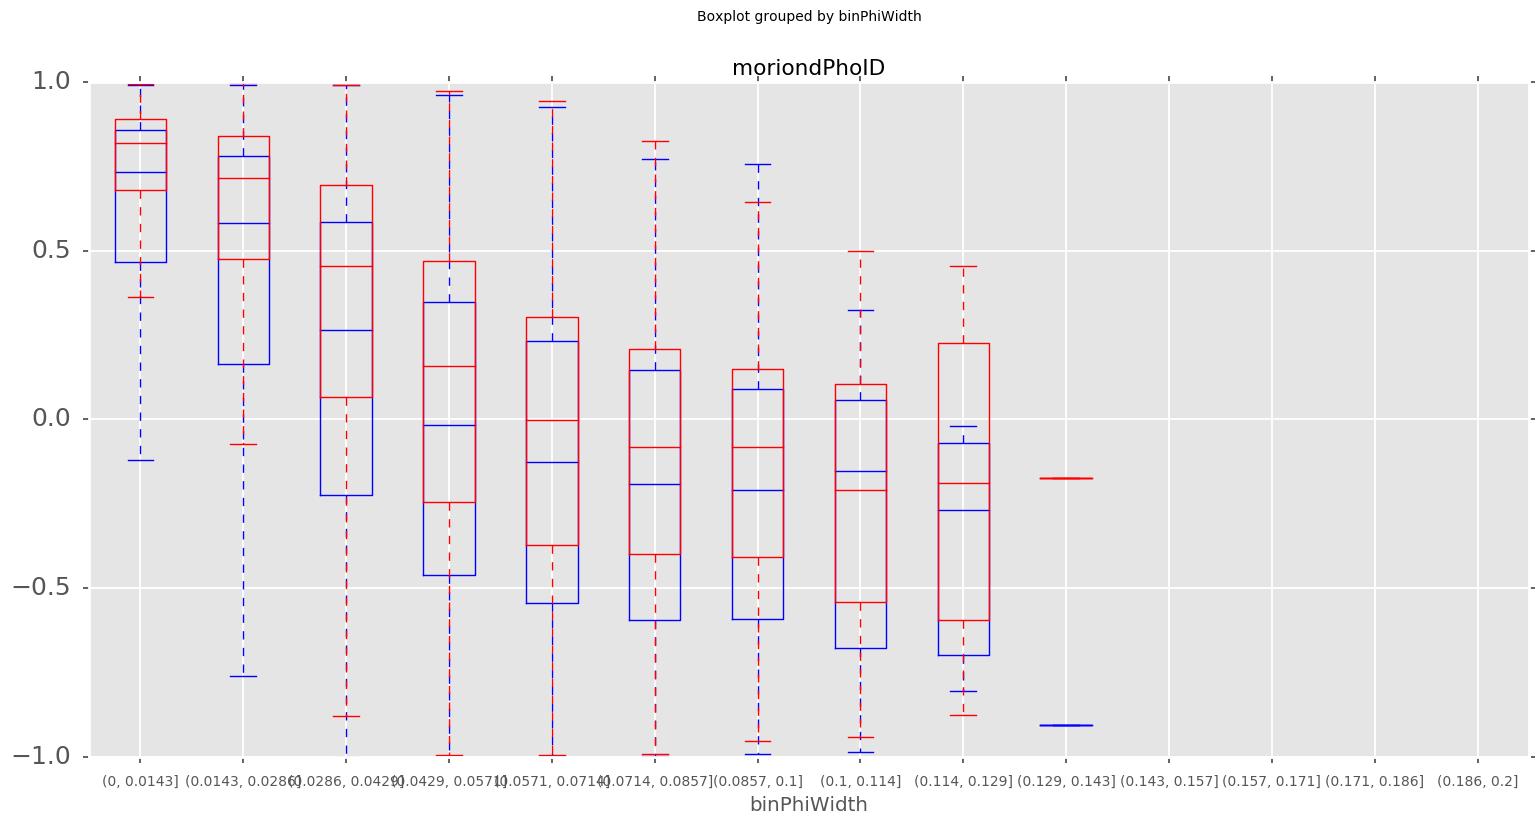

plotting  CovarianceIphiIphi


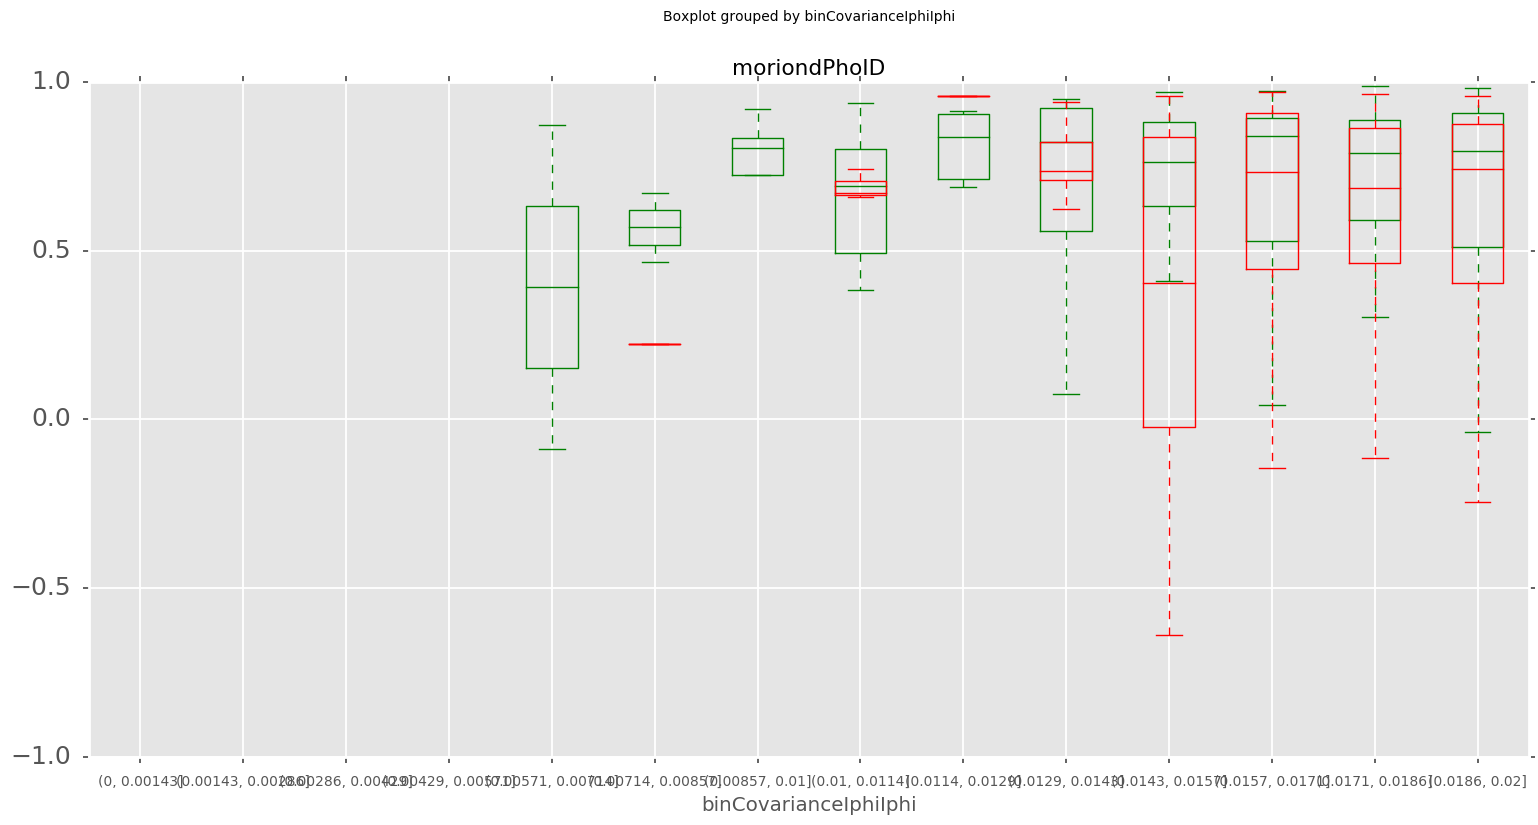

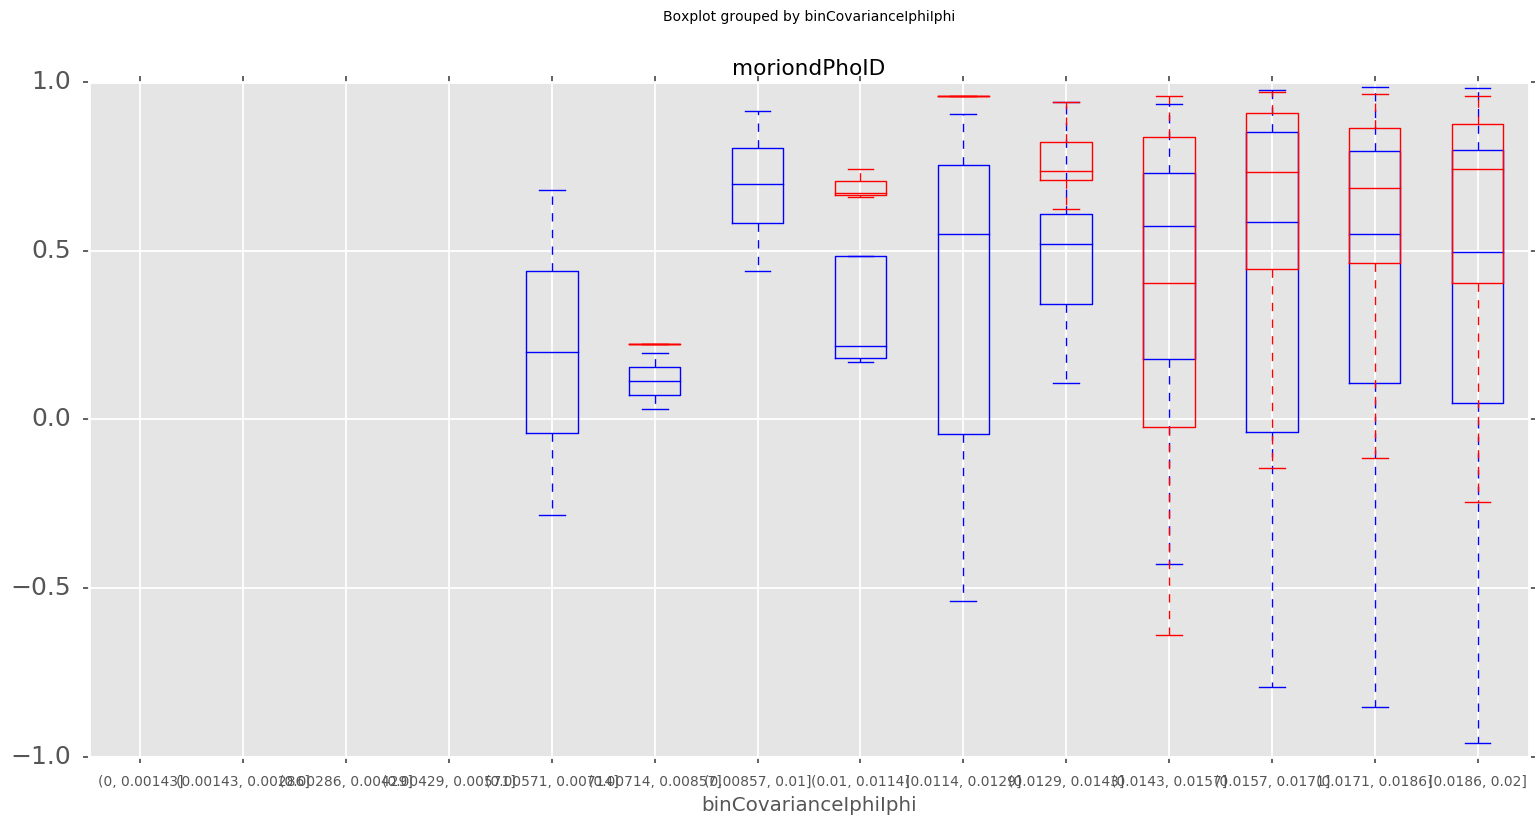

plotting  CovarianceIetaIphi


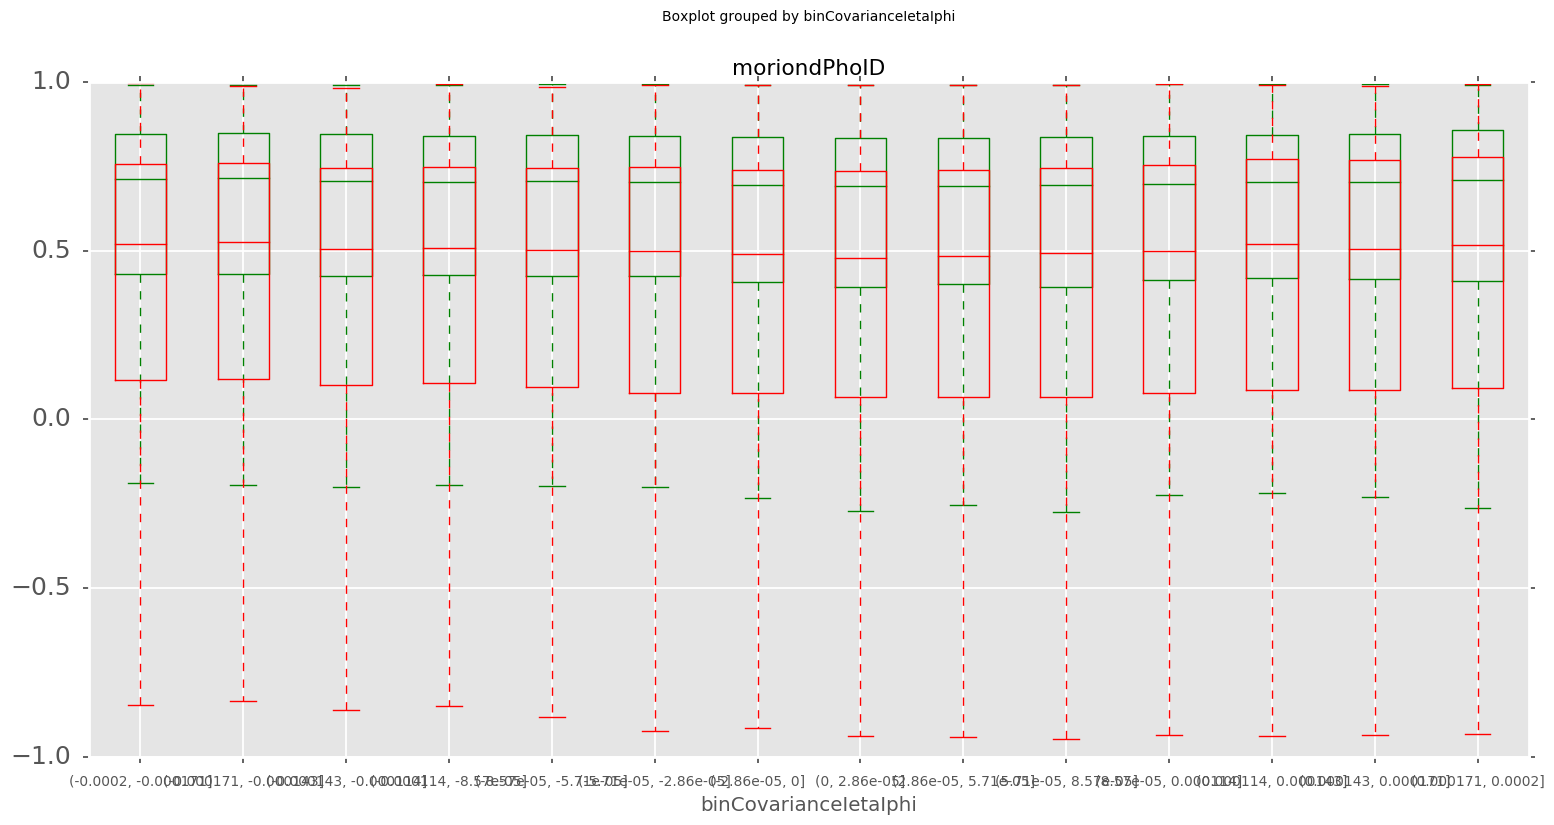

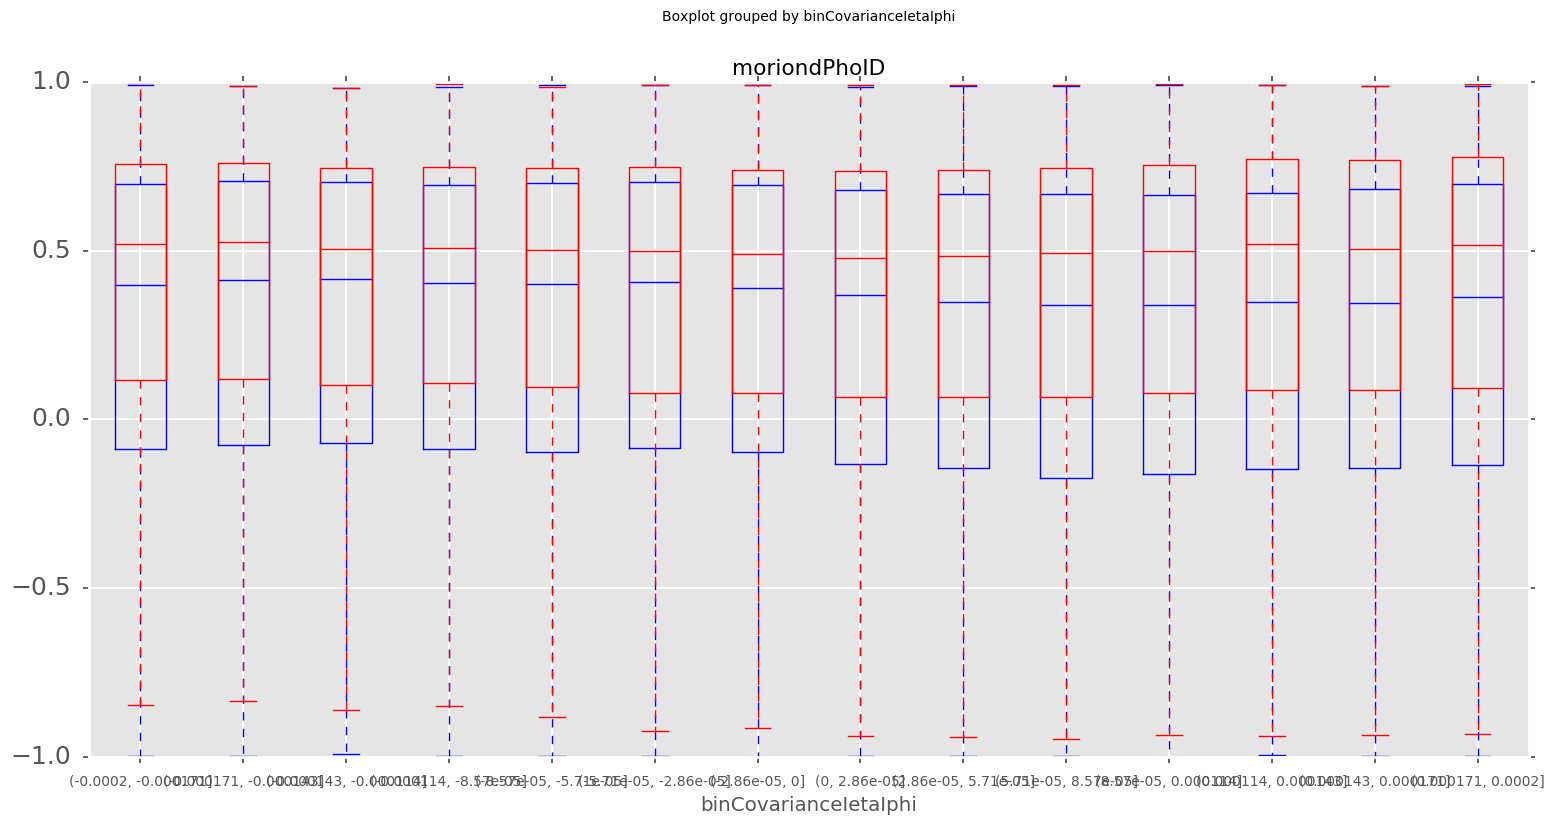

plotting  Pt


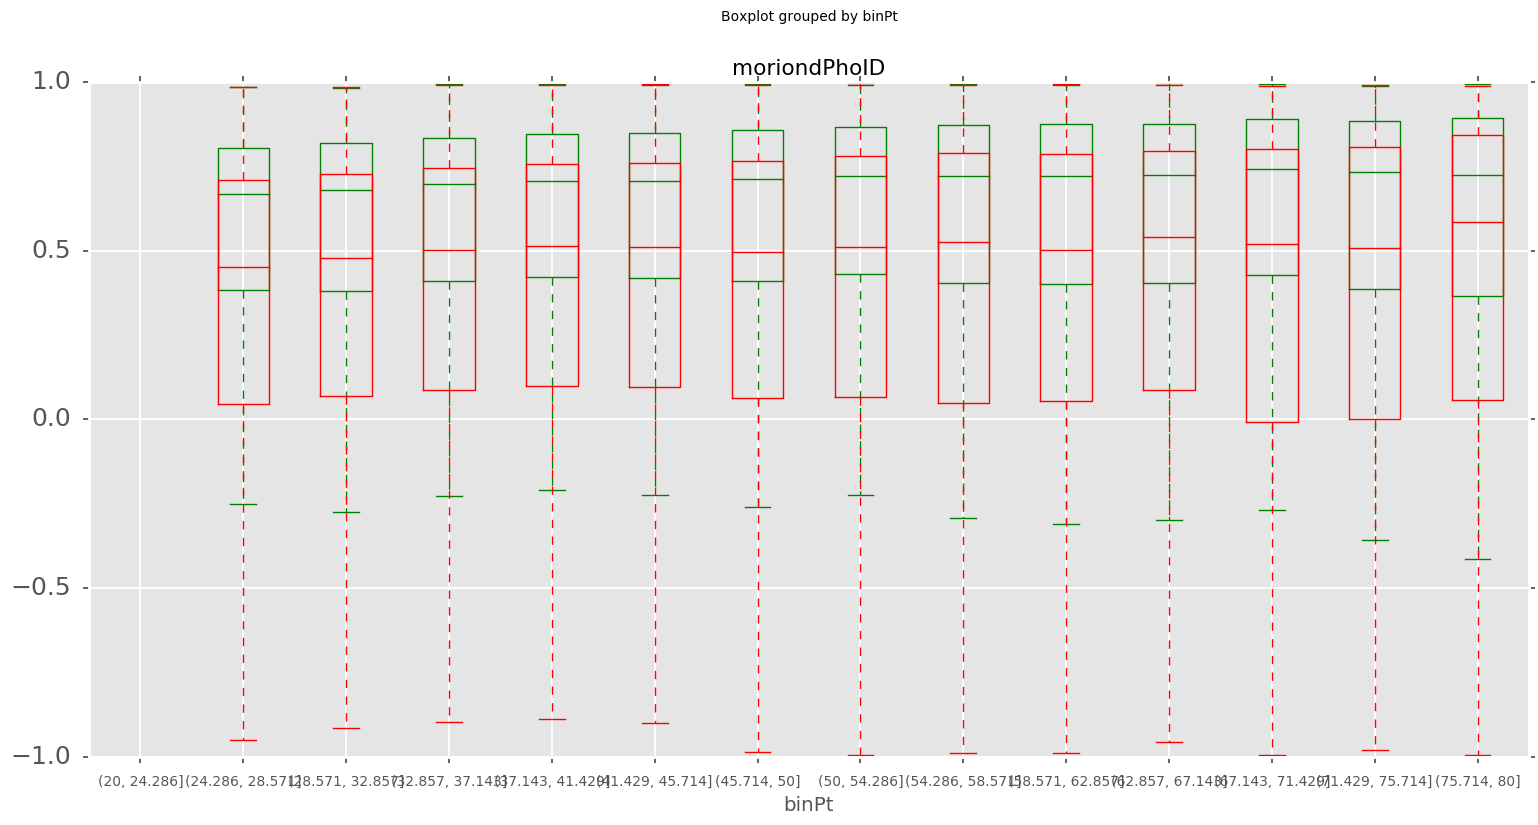

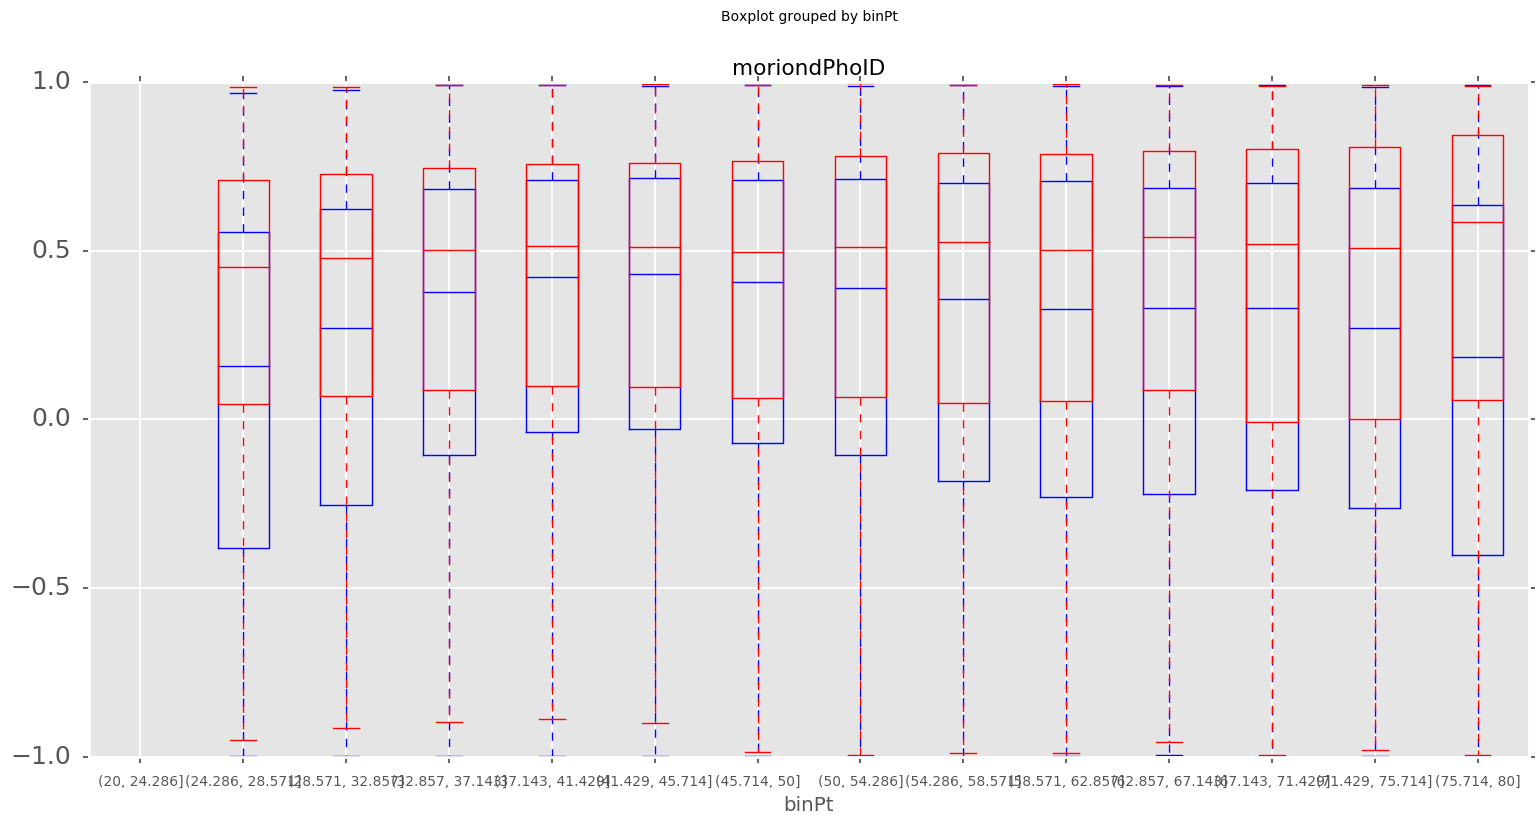

plotting  ScEta


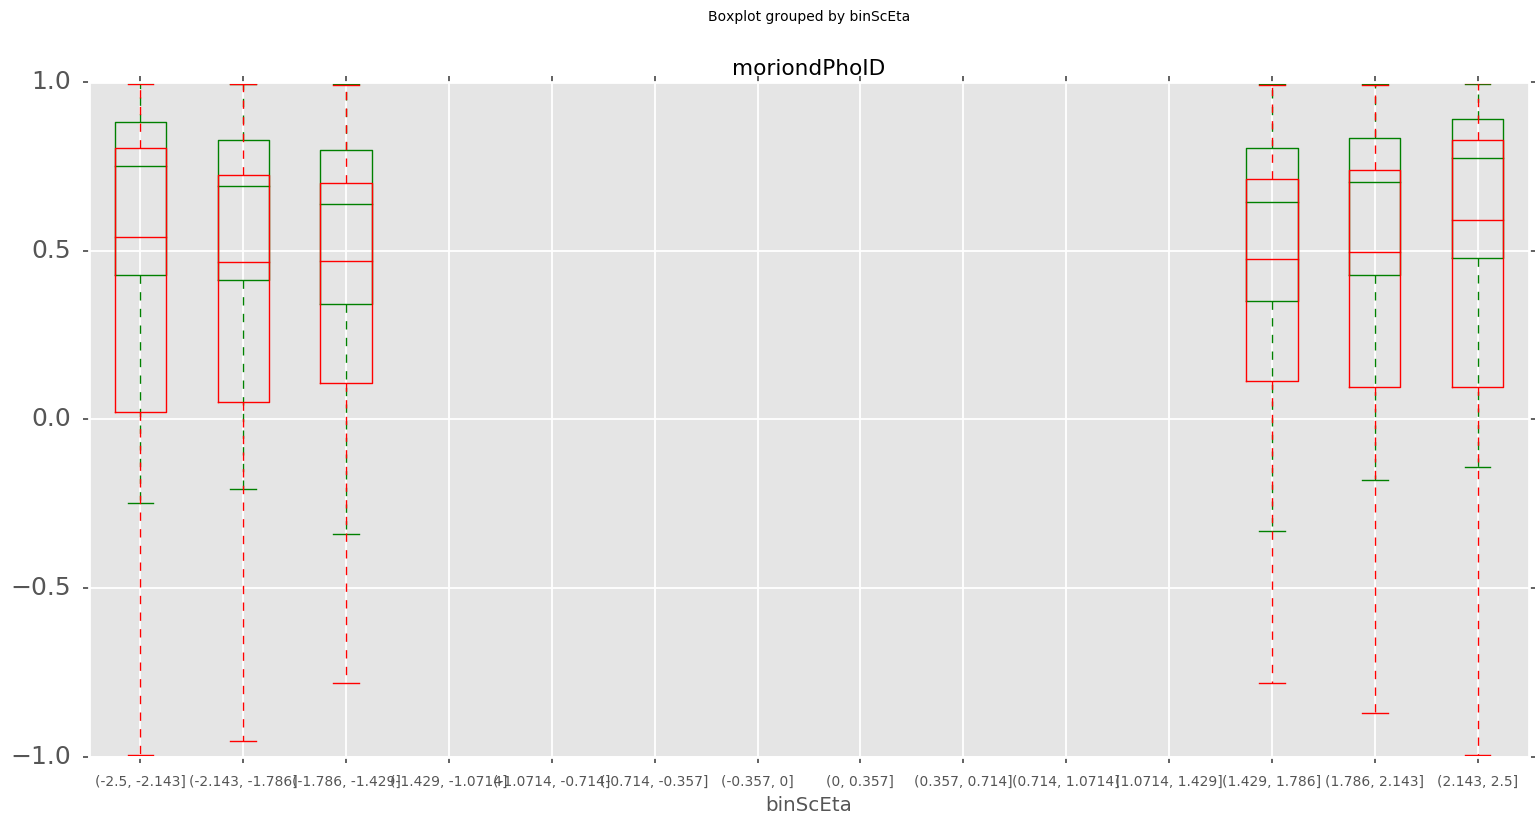

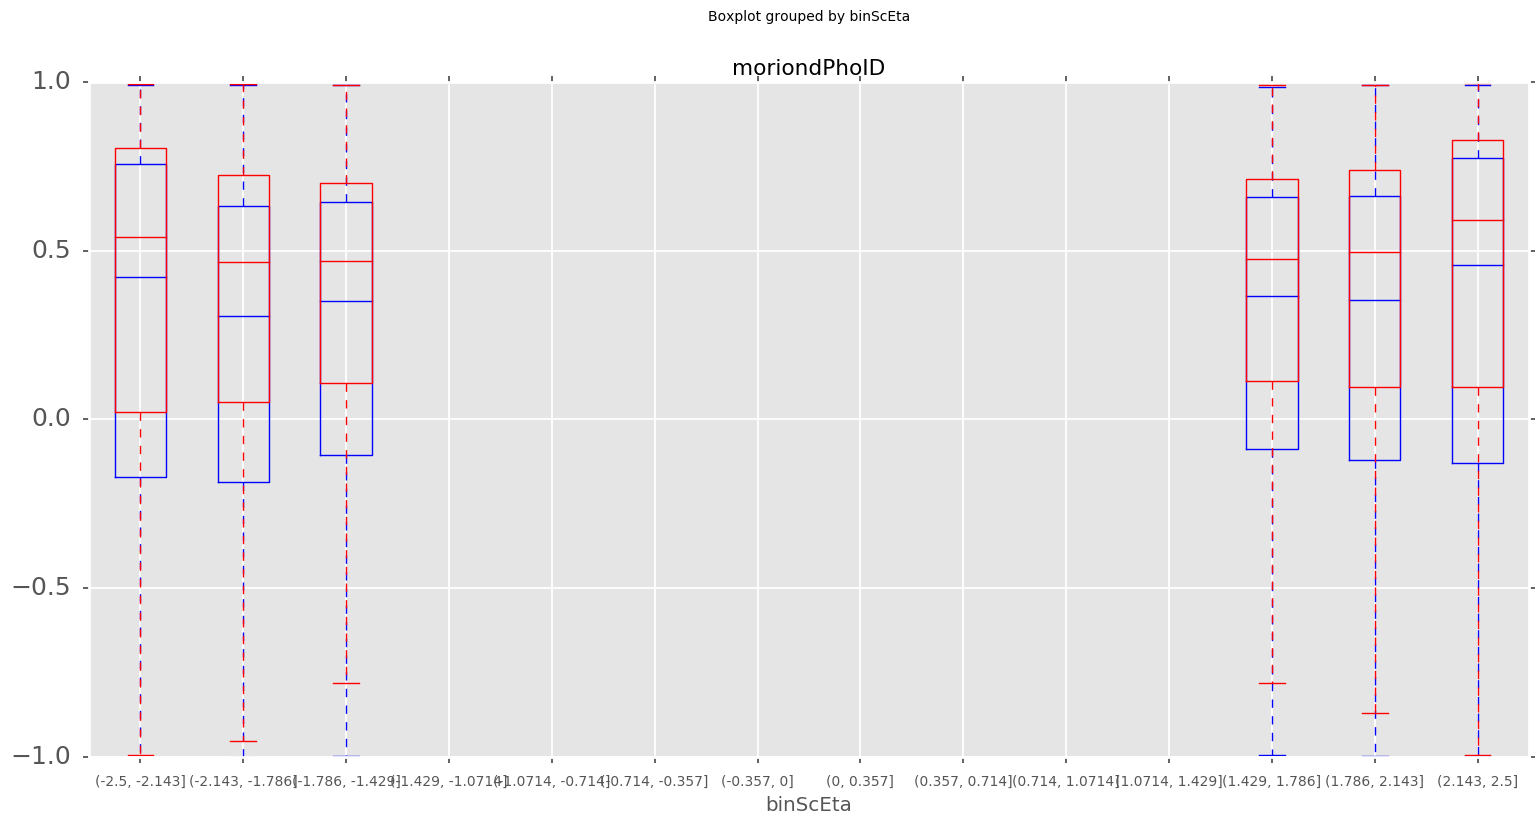

plotting  Phi


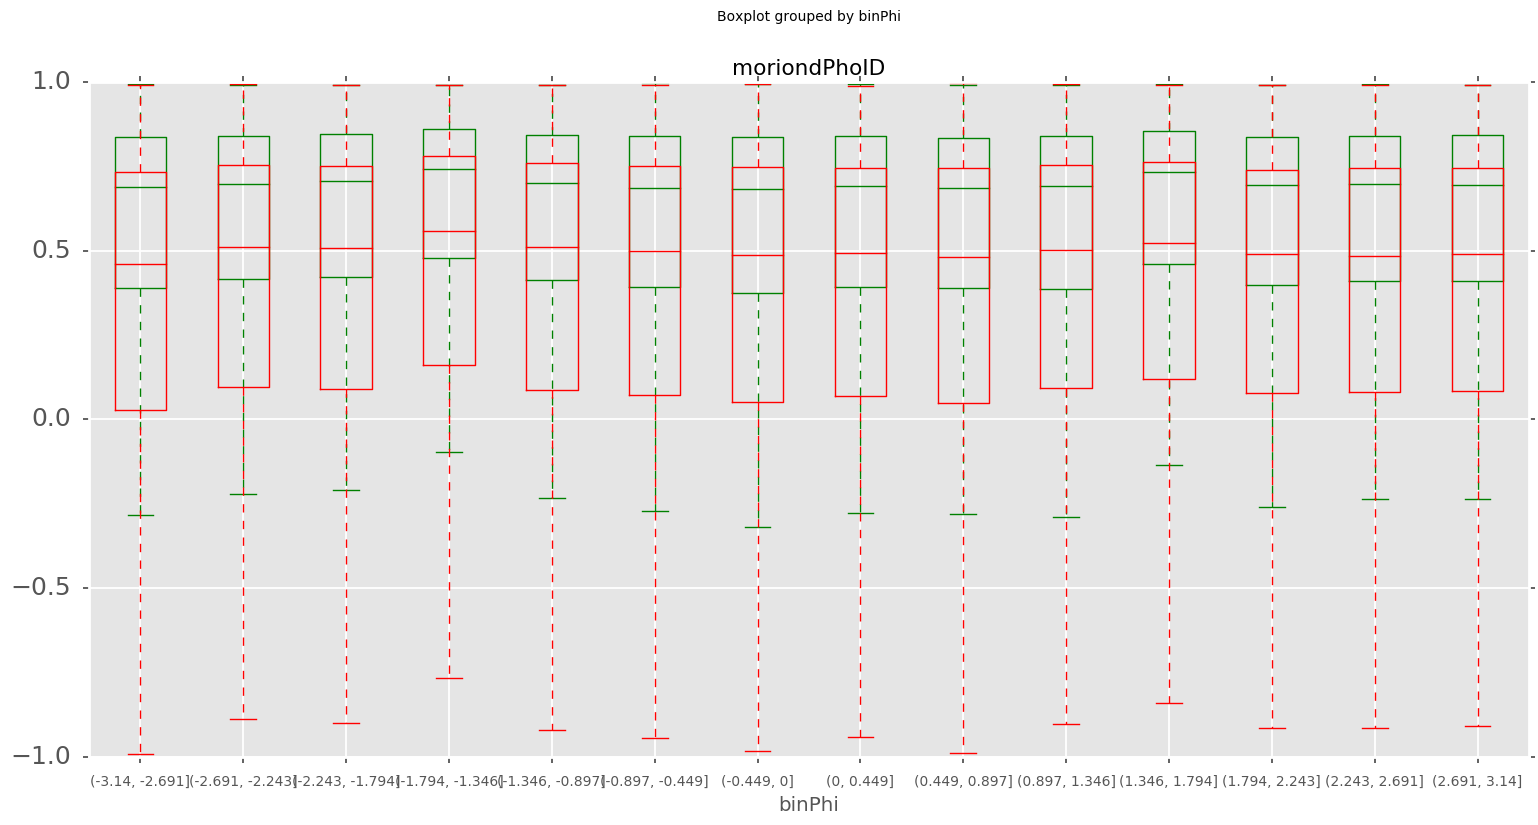

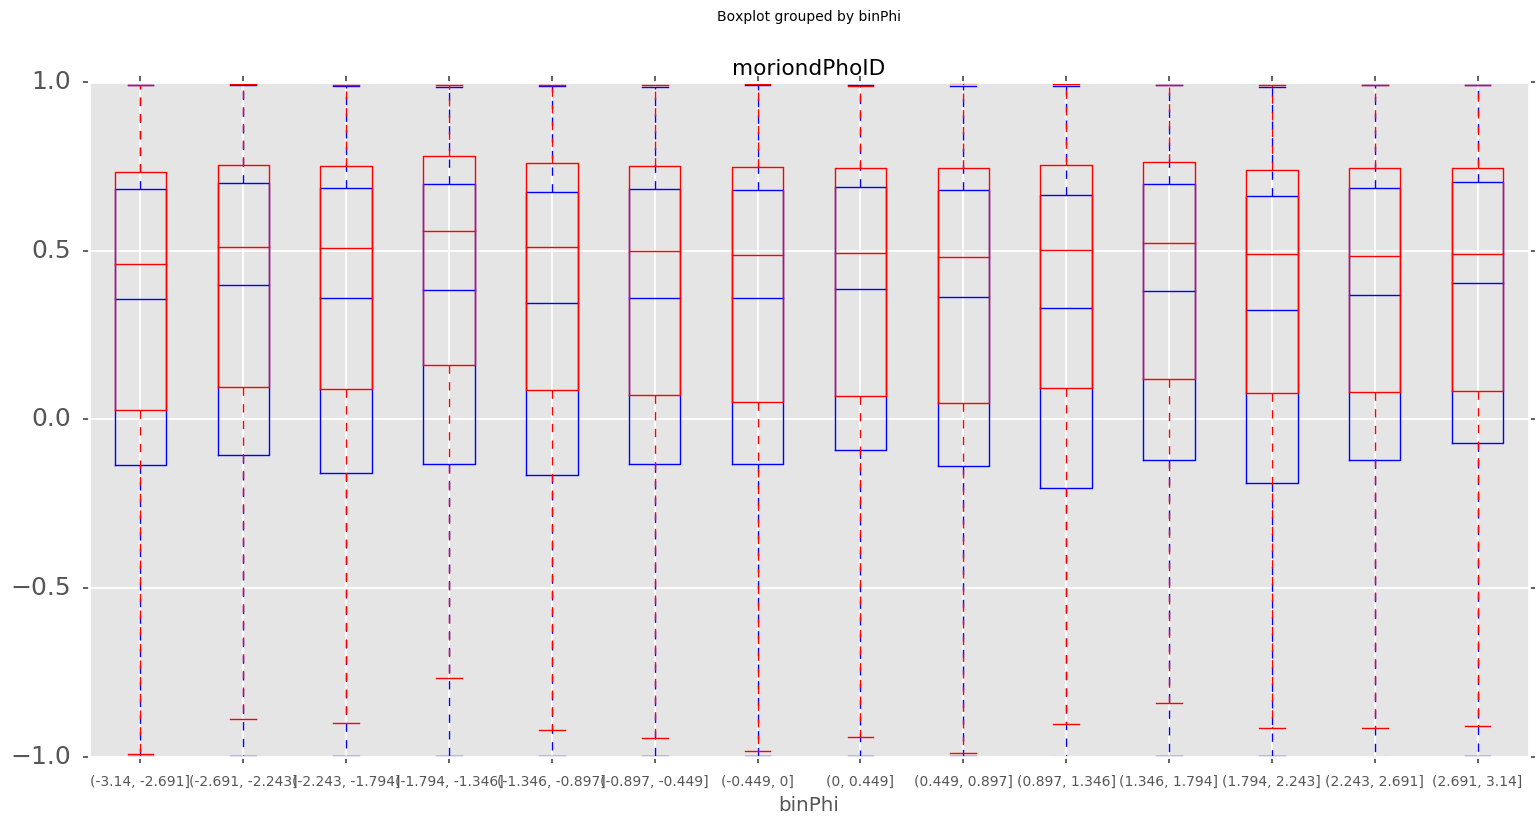

plotting  rho


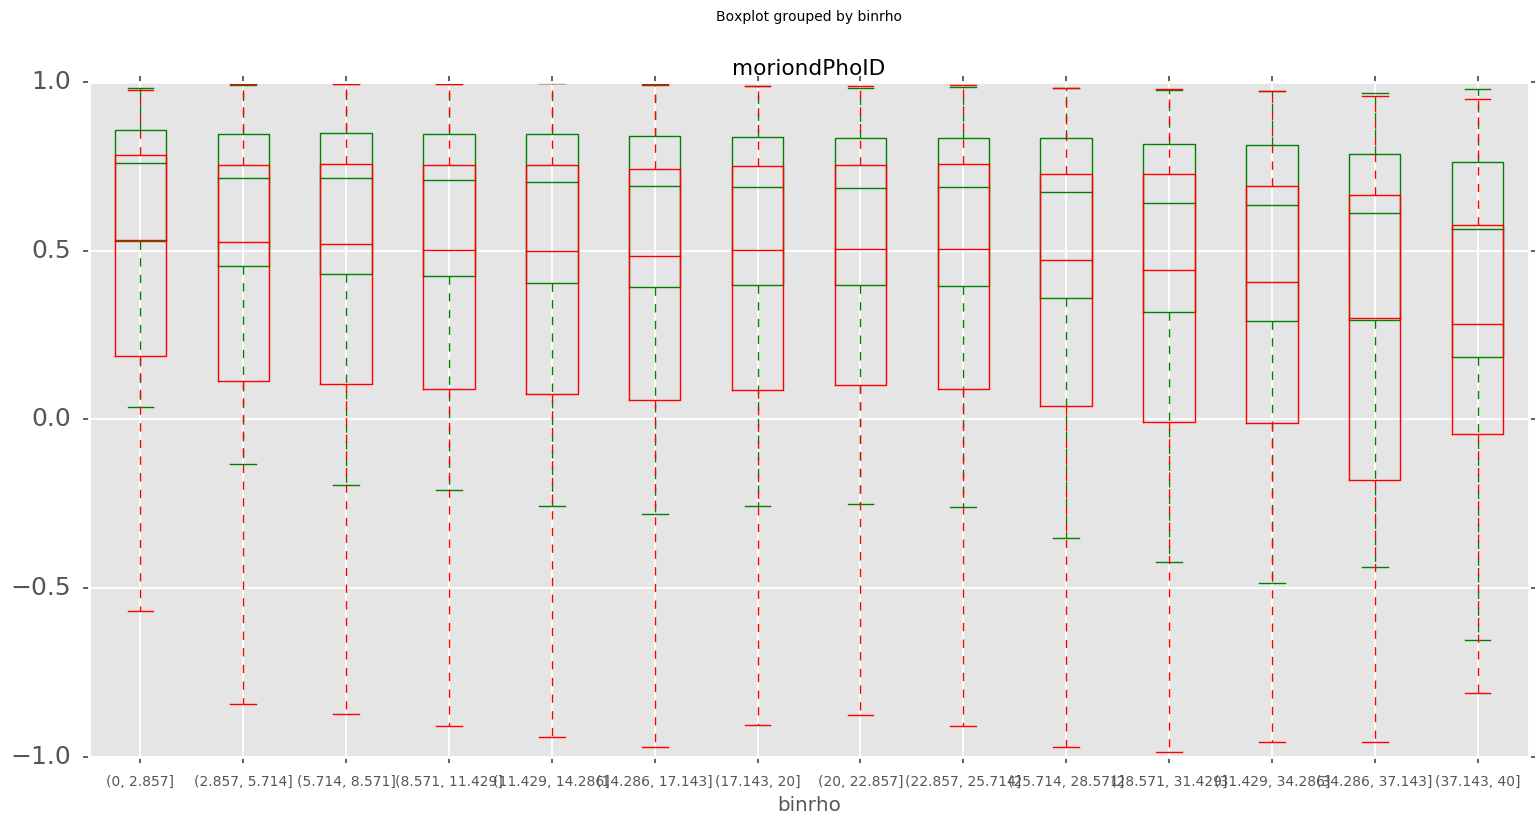

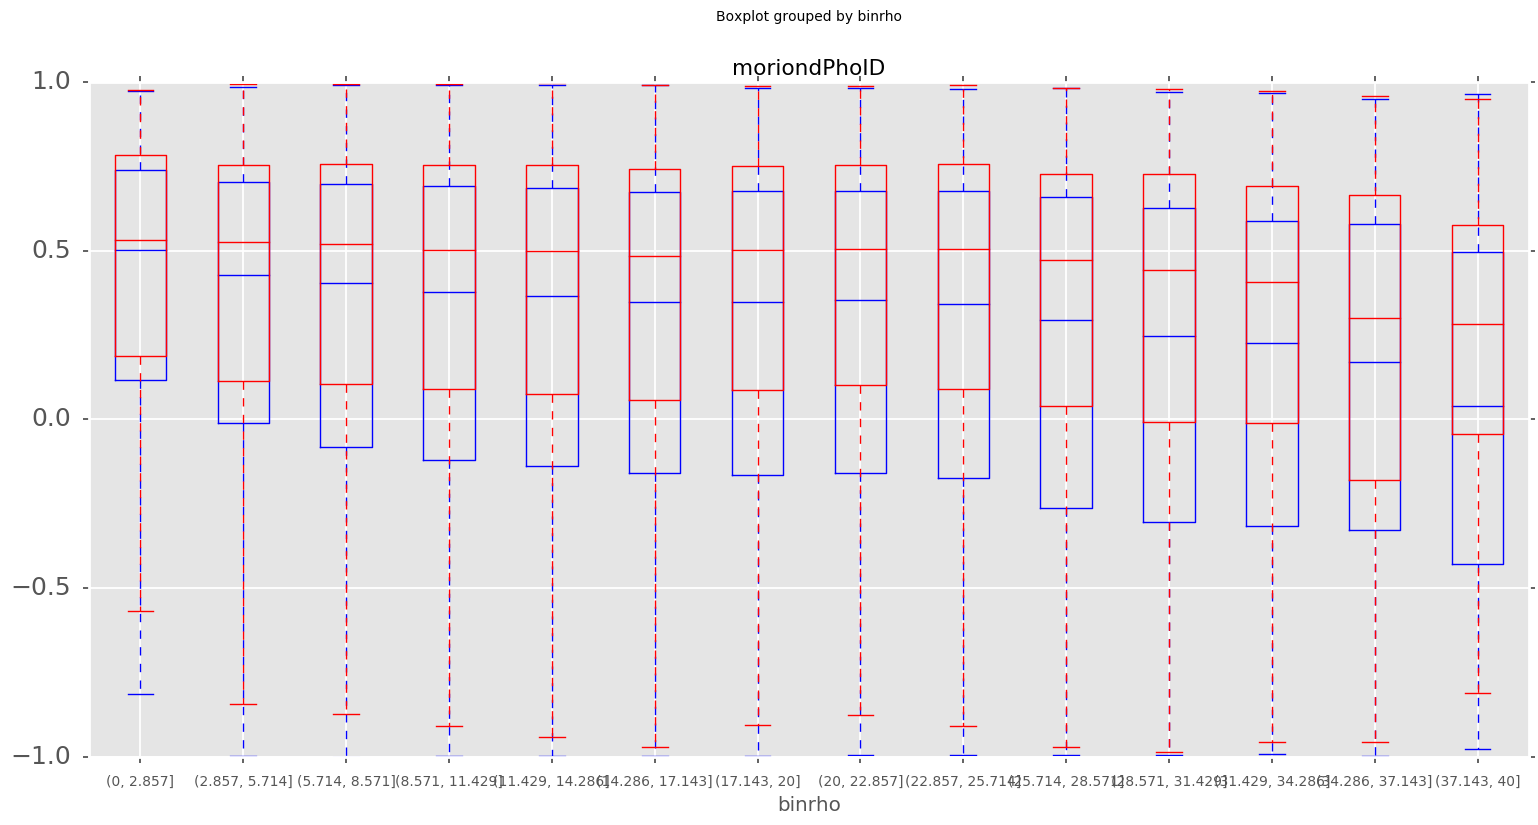

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('lines', linewidth=2)
mpl.rc('axes', linewidth=2)

dm=dfmcIsoEE
dd=dfIsoEE
sec="EE"
ylist=["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi','Pt', 'ScEta', 'Phi', 'rho']
boxes=15

for yvar in ylist:
    print "plotting ", yvar
    if yvar == "R9":
        if sec=="EB":
            rv  = np.linspace(0.75,1.0,boxes)
        else:
            rv  = np.linspace(0.75,1.0,boxes)
    if yvar == "S4":
        if sec=="EB":
            rv = np.linspace(0.35,1.0,boxes)
        else:
            rv = np.linspace(0.35,1.0,boxes)
    if yvar == "SigmaIeIe":
        if sec=="EB":
            rv = np.linspace(0.004,0.014,boxes)
        else:
            rv = np.linspace(0.014,0.020,boxes)
    if yvar == "EtaWidth":
        if sec=="EB":
            rv = np.linspace(0.0,0.05,boxes)
        else:
            rv = np.linspace(0.0,0.05,boxes)
    if yvar == "PhiWidth":
        if sec=="EB":
            rv = np.linspace(0.0,0.2,boxes)
        else:
            rv = np.linspace(0.0,0.2,boxes)
    if yvar == "CovarianceIphiIphi":
        if sec=="EB":
            rv  = np.linspace(0.0, 0.02,boxes)
        else:
            rv  = np.linspace(0.0, 0.02,boxes)
    if yvar == "CovarianceIetaIphi":
        if sec=="EB":
            rv = np.linspace(-0.0002, 0.0002,boxes) 
        else:
            rv = np.linspace(-0.0002, 0.0002,boxes) 
    if yvar=="ScEta":
        rv = np.linspace(-2.5, 2.5 ,boxes)
    if yvar=="Pt":
        rv = np.linspace(20, 80 ,boxes)
    if yvar=='rho':
        rv = np.linspace(0, 40 ,boxes)
    if yvar=="Phi":
        rv = np.linspace(-3.14, 3.14 ,boxes)
    y="moriondPhoID"
    y1="moriondPhoIDcorrAll"
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    dm['bin'+yvar] = pd.cut(dm[yvar], rv)
    bpmc = dm.boxplot(column=y,by='bin'+yvar, return_type='dict', ax=ax)
    [[item.set_color('g') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('g') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dd['bin'+yvar] = pd.cut(dd[yvar], rv)
    bpdata = dd.boxplot(column=y,by='bin'+yvar, return_type='dict', ax=ax)
    [[item.set_color('r') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    plt.show()

 
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111)
    bpmc = dm.boxplot(column=y1,by='bin'+yvar, return_type='dict', ax=ax)
    [[item.set_color('b') for item in bpmc[key]['medians']] for key in bpmc.keys()]
    [[item.set_color('b') for item in bpmc[key]['boxes']] for key in bpmc.keys()]
    [[item.set_color('b') for item in bpmc[key]['whiskers']] for key in bpmc.keys()]
    [[item.set_color('b') for item in bpmc[key]['caps']] for key in bpmc.keys()]
    dd['bin'+yvar] = pd.cut(dd[yvar], rv)
    bpdata = dd.boxplot(column=y,by='bin'+yvar, return_type='dict', ax=ax)
    [[item.set_color('r') for item in bpdata[key]['medians']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['boxes']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['whiskers']] for key in bpdata.keys()]
    [[item.set_color('r') for item in bpdata[key]['caps']] for key in bpdata.keys()]
    plt.show()

In [21]:
dfmc["SigmaIeIe"]


0          0.008876
1          0.008876
2          0.008876
3          0.008876
4          0.008876
5          0.008876
6          0.008876
7          0.008876
8          0.008876
9          0.008876
10         0.008876
11         0.008876
12         0.008876
13         0.008876
14         0.008876
15         0.008876
16         0.008876
17         0.008876
18         0.008876
19         0.008876
20         0.008876
21         0.008876
22         0.008876
23         0.008876
24         0.008876
25         0.008876
26         0.008876
27         0.008876
28         0.008876
29         0.008876
             ...   
2252353    0.023924
2252354    0.023924
2252355    0.023924
2252356    0.023924
2252357    0.023924
2252358    0.023924
2252359    0.023924
2252360    0.023924
2252361    0.023924
2252362    0.023924
2252363    0.023924
2252364    0.023924
2252365    0.023924
2252366    0.023924
2252367    0.023924
2252368    0.023924
2252369    0.023924
2252370    0.023924
2252371    0.023924
